In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
import geopandas as gpd
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins

from wordcloud import WordCloud,STOPWORDS
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Image save path
import os
save_path = "save/visualization/"
# Create save folder
if not os.path.exists(save_path):
    os.makedirs(save_path)
# Set sns themec
# plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

In [3]:
# Create a pandas dataframe of the Airbnb data
data = pd.read_csv('dataset/AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

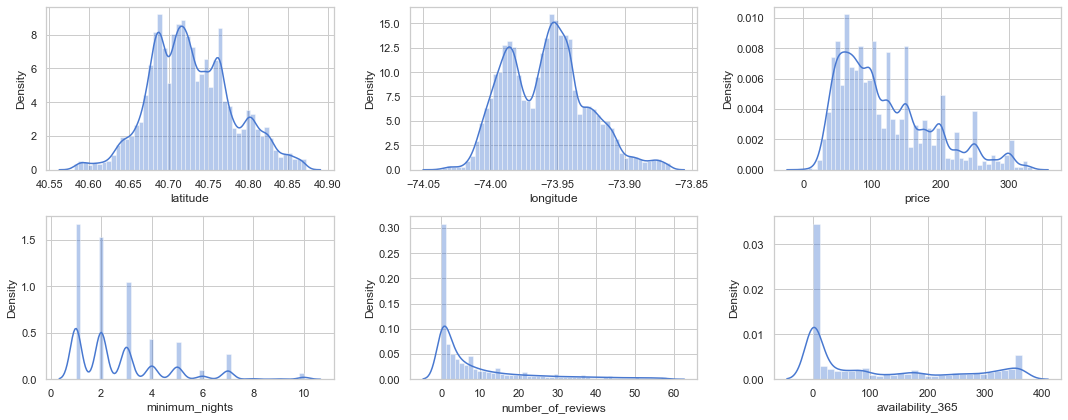

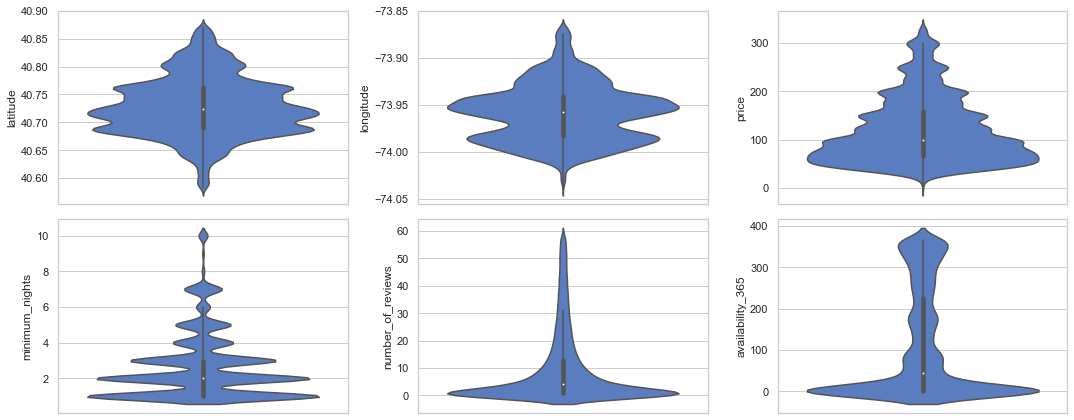

In [5]:
from code.visualization import numerical_plot
attributes = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']
numerical_plot(data,attributes,"distplot","plot_numerical_distribution_1.png")
numerical_plot(data,attributes,"violinplot","plot_numerical_distribution_2.png")

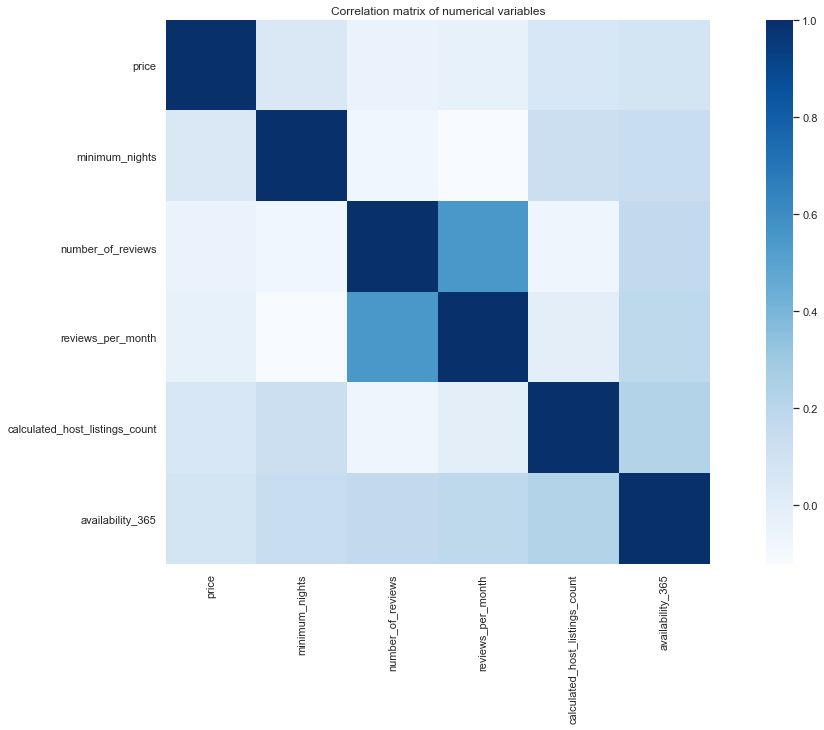

In [6]:
from code.visualization import cm_plot
drop_attributes = ['id', 'host_id', 'latitude', 'longitude']
cm_plot(data, drop_attributes, "plot_correlation_matrix.png")

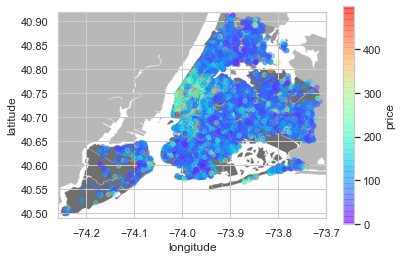

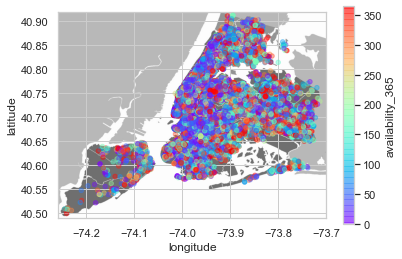

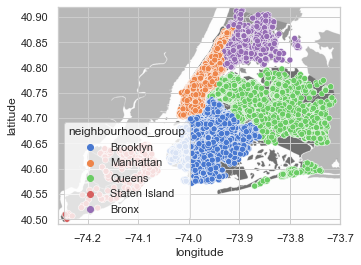

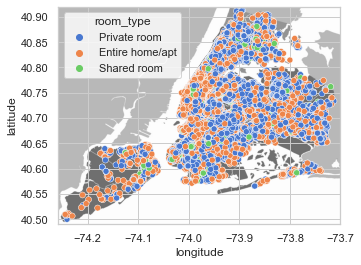

In [7]:
from code.visualization import geographical_distribution_colormap, geographical_distribution_scatterplot
geographical_distribution_colormap(data[data.price < 500], 'price', "dataset/New_York_City_.png.jpeg", "plot_heatmap_1.png")
geographical_distribution_colormap(data[data.price < 500], 'availability_365', "dataset/New_York_City_.png.jpeg", "plot_heatmap_2.png")
geographical_distribution_scatterplot(data, "neighbourhood_group", "dataset/New_York_City_.png.jpeg", "plot_scatterplot_1.png")
geographical_distribution_scatterplot(data, "room_type", "dataset/New_York_City_.png.jpeg", "plot_scatterplot_2.png")

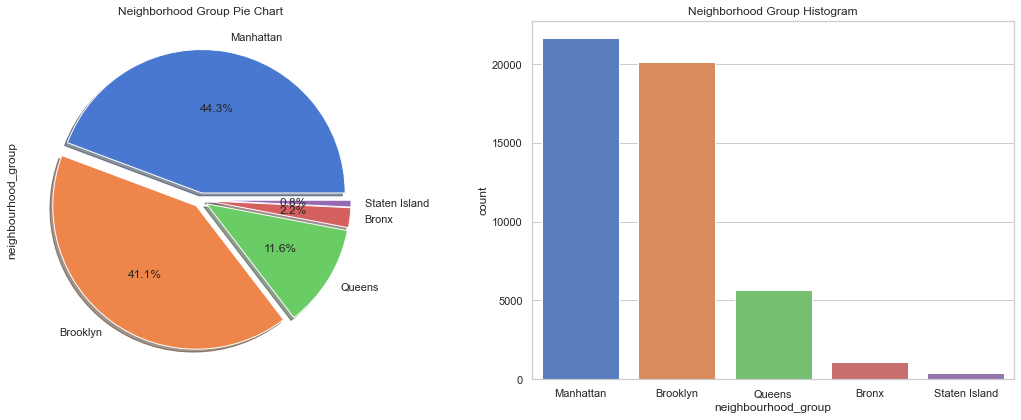

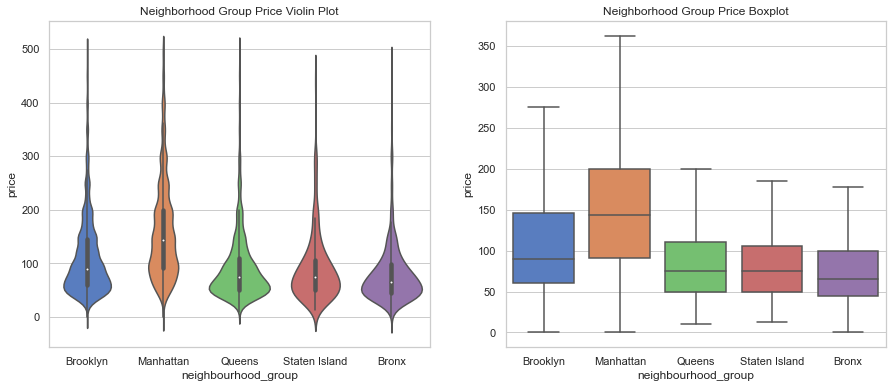

In [8]:
from code.visualization import neighbourhood_group_hosts_analysis, neighbourhood_group_price_analysis, comprehensive_analysis
neighbourhood_group_hosts_analysis(data, "plot_count_neighbourhood_group.png")
neighbourhood_group_price_analysis(data[data.price<500], "plot_price_neighberhood_group.png")
comprehensive_analysis(data, "plot_room_price_neighberhood_group.png")

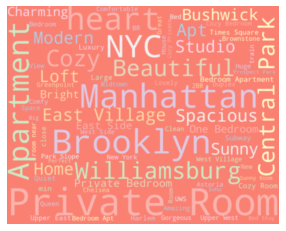

In [9]:
from code.visualization import make_wordcloud
make_wordcloud(data['name'].dropna())